In [1]:
import pandas as pd
# Define the path to your CSV file
file_path = 'Desktop/Fremont_Bridge_Bicycle_Counter_20240715.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path, index_col='Date',parse_dates=True)
data.head()


/tmp/ipykernel_461749/1624034463.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, index_col='Date',parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [2]:
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,
2012-10-02 13:00:00,7.0,48.0
2012-10-02 14:00:00,55.0,75.0
2012-10-02 15:00:00,81.0,71.0
2012-10-02 16:00:00,167.0,111.0
2012-10-02 17:00:00,393.0,170.0


Traceback (most recent call last):
  File "/home/alejandro/miniconda3/envs/ale_analysis/bin/matplotlib", line 11, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


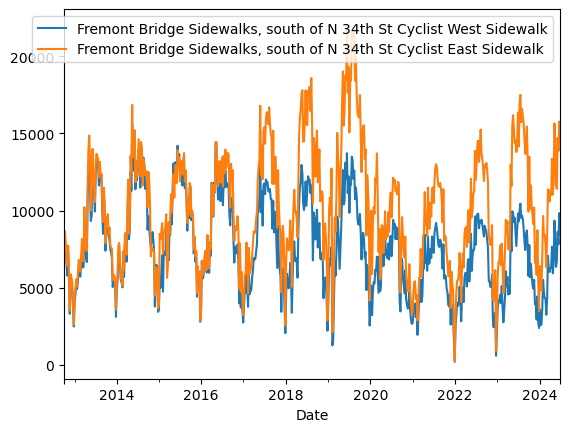

In [3]:
!matplotlib inline
data.resample('W').sum().plot();


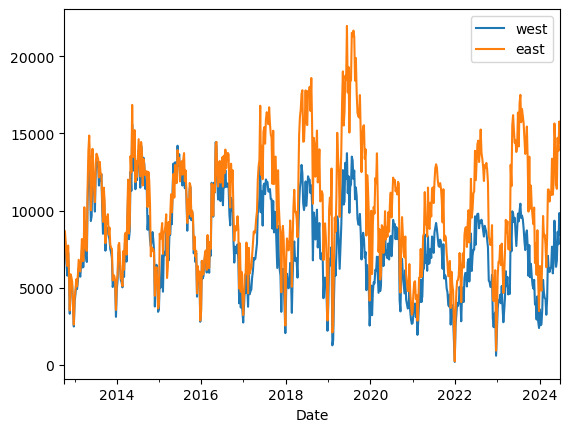

In [4]:
import matplotlib.pyplot as plt
data.columns =['west','east']
data.resample('W').sum().plot();

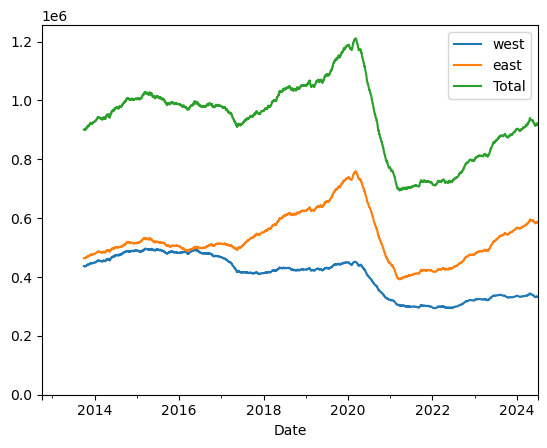

In [5]:
data['Total'] = data['west'] + data['east']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

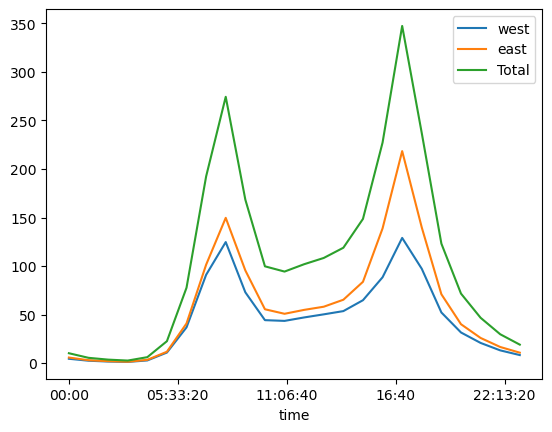

In [6]:
data.groupby(data.index.time).mean().plot();

In [7]:
pivotes = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivotes.iloc[:5,:5]

,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06
00:00:00,NaN,13.0,18.0,11.0,15.0
01:00:00,NaN,10.0,3.0,8.0,15.0
02:00:00,NaN,2.0,9.0,7.0,9.0
03:00:00,NaN,5.0,3.0,4.0,3.0
04:00:00,NaN,7.0,8.0,9.0,5.0


In [8]:
pivotes.plot(legent=False, aplha=0.01);


AttributeError: Line2D.set() got an unexpected keyword argument 'legent'

Error in callback <function _draw_all_if_interactive at 0x7f23ca4b7a60> (for post_execute):


ValueError: microsecond must be in 0..999999

ValueError: microsecond must be in 0..999999

<Figure size 640x480 with 1 Axes>